## About fish detection competition

### In this competition patricipants had to distinguish 2 groups of fish (Jumper School and Breezer School) from other similar objects such as birds, dolphins, clouds, ripples, wakes and so on.

## EDA

In [1]:
import bbox_visualizer
import numpy as np
import pandas as pd
import cv2
import os
from PIL import Image
import random
from random import randint
import matplotlib.pyplot as plt

In [2]:
data_dir = os.path.abspath('H:/fish_detection/')

In [3]:
tr_len = len(os.listdir(os.path.join(data_dir, 'train_images')))
tst_len = len(os.listdir(os.path.join(data_dir, 'test_images')))
print(f"Train dataset lenght = {tr_len}")
print(f"Test dataset lenght = {tst_len}")

Train dataset lenght = 3387
Test dataset lenght = 1481


In [4]:
filename = 'train_0001'
annot_example = pd.read_json(os.path.join(data_dir, 'train_annotations', filename+'.json'), lines=True)
annot_example.head()

attributes  \
0  {'sequence_id': 42, 'frame_id': 26}   

                                              labels  
0  {'Jumper School': [[1841, 528, 3006, 1261], [1...

In [5]:
boxes = []
labels = []
for k, v in annot_example.iloc[0, 1].items():
    labels.extend([k]*len(v))
    boxes.extend(v)

In [6]:
img = cv2.imread(os.path.join(data_dir, 'train_images', filename+'.jpg'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 4
thickness = 5



for box, label in zip(boxes, labels):
    cv2.rectangle(img, (box[0], box[1]), (box[2],  box[3]), (0, 255, 0), 5)
    cv2.putText(img, str(label), (box[0], box[1]),
                        font, fontScale, (255, 0, 0), thickness, cv2.LINE_AA)
ax.set_axis_off()
ax.imshow(img);

In [7]:
df = pd.read_csv(os.path.join(data_dir, 'bboxes_folds.csv'))
df.head()

image_name          label                    bboxes  \
0  train_0000  Jumper School   [1250, 794, 1852, 1309]   
1  train_0000  Jumper School   [925, 1236, 1310, 1559]   
2  train_0000  Jumper School     [12, 1184, 550, 1459]   
3  train_0001  Jumper School   [1841, 528, 3006, 1261]   
4  train_0001  Jumper School  [1984, 1301, 2376, 1520]   

                             atributes          x1          y1          x2  \
0  {'sequence_id': 134, 'frame_id': 8}  166.666667  188.207407  246.933333   
1  {'sequence_id': 134, 'frame_id': 8}  123.333333  292.977778  174.666667   
2  {'sequence_id': 134, 'frame_id': 8}    1.600000  280.651852   73.333333   
3  {'sequence_id': 42, 'frame_id': 26}  245.466667  125.155556  400.800000   
4  {'sequence_id': 42, 'frame_id': 26}  264.533333  308.385185  316.800000   

           y2           h           w   ...    Cloud  Jumper School  Ripple  \
0  310.281481  122.074074   80.266667   ...        0              1       0   
1  369.540741   76.562963   51.333333   ...        0              1       0   
2  345.837037   65.185185   71.733333   ...        0              1       0   
3  298.903704  173.748148  155.333333   ...        0              1       0   
4  360.296296   51.911111   52.266667   ...        0              1       0   

   Smooth Surface  Wake  fold_0  fold_1  fold_2  fold_3  fold_4  
0               0     0   valid   valid   train   valid   train  
1               0     0   valid   valid   train   valid   train  
2               0     0   valid   valid   train   valid   train  
3               0     0   train   train   train   train   train  
4               0     0   train   train   train   train   train  

[5 rows x 25 columns]

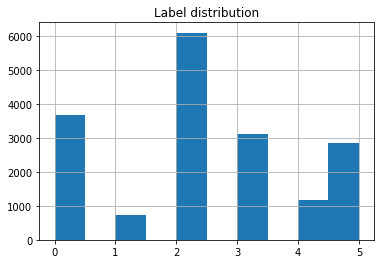

In [8]:
df['encoded_labels'].hist()
plt.title('Label distribution');

In [9]:
print('Label distribution:\n', df.groupby('label').size())


Label distribution:
 label
Breezer School    3669
Cloud              719
Jumper School     6093
Ripple            3121
Smooth Surface    1165
Wake              2841
dtype: int64


## Final pipeline

In [20]:
def display_image_in_actual_size(im_path):

    dpi = 70
    im_data = plt.imread(im_path)
    height, width, depth = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

display_image_in_actual_size("pipeline.jpg")

### All augmentations was applied with [albumentation](https://github.com/albumentations-team/albumentations) library
### For training [detectron2](https://github.com/facebookresearch/detectron2) framework was used
### Weighted-Boxes-Fusion was applied with [this](https://github.com/ZFTurbo/Weighted-Boxes-Fusion) library

## Results

### The pipeline was trained on 80 epochs and gave 0.5 mean average precision score on valid set and 0.56 on Public  and Private Leaderboards what gives 15 place and Silver Medal!